# Advanced Machine Learning - Assignment 1

## a) Take height as predictor and weight as output. Fit a polynomial of degree 3 to your training data and display the results. Then, report the accuracy of the fit on your test dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
HW = pd.read_csv(r'C:\IITR\IIT - DS&ML\Assignments\AML\Height_Weight.csv')
print(HW.shape)

(10000, 3)


In [3]:
HW.head(2)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473


In [7]:
x = HW.iloc[:,1].values
y = HW.iloc[:,2].values

# Poly feature build, split train and test, Fit Model and Predict

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [9]:
poly = PolynomialFeatures(degree=3, include_bias = True)

In [10]:
poly_features = poly.fit_transform(x.reshape(-1,1))

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(poly_features, y, test_size = 0.20, random_state = 0)

In [12]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(xtrain, ytrain)

LinearRegression()

In [13]:
ypred = poly_reg_model.predict(xtest)

# Accuracy Scores:

In [16]:
from sklearn.metrics import r2_score, mean_squared_error

# The mean squared error
print('Root Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(ytest,ypred)))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: %.2f'
      % r2_score(ytest,ypred))

Root Mean squared error: 11.99
R^2 Score: 0.86


# Degree 3 Polynomial plotting

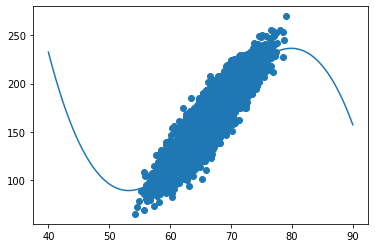

In [17]:
my_model = np.poly1d(np.polyfit(x,y,3))
#my_model = np.polyfit(xtrain,ytrain,p)
n = len(x)
my_line  = np.linspace(40,90,n)

plt.scatter(x,y)
plt.plot(my_line, my_model(my_line))
plt.show()

## b) Apply Lasso and Ridge Regression to the above training/test data that you generated in (a), for an alpha value of 100. Report your results and explain your findings

# Ridge Regression

In [18]:
from sklearn.linear_model import Ridge

In [19]:
ridgeR = Ridge(alpha=100)
ridgeR.fit(xtrain,ytrain)
ridge_ypred = ridgeR.predict(xtest)

In [21]:
from sklearn.metrics import r2_score, mean_squared_error

# The mean squared error
print('Root Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(ytest,ridge_ypred)))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: %.2f'
      % r2_score(ytest,ridge_ypred))


Root Mean squared error: 12.10
R^2 Score: 0.86


# Lasso Regression

In [22]:
from sklearn.linear_model import Lasso

In [23]:
LassoR = Lasso(alpha=100)
LassoR.fit(xtrain,ytrain)
Lasso_ypred = LassoR.predict(xtest)

In [24]:
from sklearn.metrics import r2_score, mean_squared_error

# The mean squared error
print('Root Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(ytest,Lasso_ypred)))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: %.2f'
      % r2_score(ytest,Lasso_ypred))


Root Mean squared error: 12.27
R^2 Score: 0.85


Compare Intercept and Coefficients

In [25]:
print("Polynomial Regression - Intercept and Coefficient")
print(poly_reg_model.intercept_)
print(poly_reg_model.coef_)

print("Ridge - Intercept and Coefficient")
print(ridgeR.intercept_)
print(ridgeR.coef_)

print("Lasso - Intercept and Coefficient")
print(LassoR.intercept_)
print(LassoR.coef_)

Polynomial Regression - Intercept and Coefficient
4113.737251038335
[ 0.00000000e+00 -1.94815400e+02  3.05409003e+00 -1.53086298e-02]
Ridge - Intercept and Coefficient
-166.08674587795704
[ 0.00000000e+00 -9.56503442e-01  1.35379474e-01 -7.01970004e-04]
Lasso - Intercept and Coefficient
-8.94043841799197
[0.         0.         0.         0.00057709]


# Conclusion:

### With alpha value 100, Both Ridge and Lasso regression produces almost same result.
### Lasso - Coefficient are zero compared to ridge